In [16]:
# import pysam
# from pysam import VariantFile as vcf
import operator
from math import log2
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
import scipy
import  os
import os.path
import matplotlib.colors as mcolors
from scipy import stats
import csv
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

In [17]:
fileName = '../../../1000_population.tsv'


lines = []
categories = ["All"]
samplenames=[]

with open(fileName, 'r') as f:
    text = f.read()

lines = text.split('\n')
for l in lines:
    samplenames.append(l.split('\t')[0])
    categories.append(l.split('\t')[-1])
allcategories=sorted(list(set(categories)))


In [18]:
def random_colors(num_colors):
    random_colors = []
    for _ in range(num_colors):
        random_color = list(np.random.rand(3))
        random_colors.append(random_color)
    return random_colors
#27 random color
num_colors = 27
color_list = random_colors(num_colors)
color_list

[[0.047952036572187606, 0.5235614582598664, 0.4652832291380308],
 [0.5629956316491324, 0.9308672468729485, 0.9623860056124882],
 [0.23076106230689675, 0.20955621722888362, 0.4963480382558607],
 [0.9895032726158998, 0.372195649127785, 0.5652715104797112],
 [0.32870406812725395, 0.07621839460321878, 0.34172104409200377],
 [0.2685564664495993, 0.7148415269998117, 0.08120918600952076],
 [0.4754824232384093, 0.5316489073234613, 0.6616229303104326],
 [0.37051332125942027, 0.3126874240029902, 0.11365422285391868],
 [0.2917697256914038, 0.7293494473015922, 0.6617488186051368],
 [0.1059968927788707, 0.802474649567944, 0.16127671394291576],
 [0.08695555978178537, 0.7841086961757952, 0.4392380118593867],
 [0.3229875796219658, 0.06315644399030773, 0.06368542934566668],
 [0.07316918366523562, 0.579784480742231, 0.6870332762370147],
 [0.14937341051502728, 0.34867243163345185, 0.5854699190002144],
 [0.7287252458904081, 0.7910013135177522, 0.5595956641577214],
 [0.7208449248664961, 0.2015272515422416,

In [19]:
len(allcategories)

27

In [20]:
#pic2
mhc_pos_path="/data2/wangxuedong/mhc_test_data/first_review/csvfiles/mhc.csv"
df_mhc_pos_path=pd.read_csv(mhc_pos_path)
df_race_pos=pd.read_csv("/data2/wangxuedong/mhc_test_data/first_review/race/posmhc.csv")

In [21]:

mhc_race_positions_dict={'ACB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
  'All':{'mhc':[[29720403, 29913914], [30994370, 31528792], [32212726, 32882258]]},
 'ASW': {'mhc': [[29720403, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'BEB': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CDX': {'mhc': [[30994370, 31528792], [32212726, 32923168]]},
 'CEU': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'CHB': {'mhc': [[29720403, 29913914],
   [29939668, 30154438],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'CHS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32397207, 32882258]]},
 'CLM': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ESN': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32423532, 32882258]]},
 'FIN': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GBR': {'mhc': [[30994370, 31528792], [32212726, 32882258]]},
 'GIH': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'GWD': {'mhc': [[29720403, 30120966],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'IBS': {'mhc': [[29720403, 29896285],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'ITU': {'mhc': [[29720403, 30011739],
   [31052133, 31528792],
   [32212726, 32882258]]},
 'JPT': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'KHV': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'LWK': {'mhc': [[29720403, 30011739],
   [31052133, 31528792],
   [32397207, 32923168]]},
 'MSL': {'mhc': [[29720403, 30011739],
   [30959575, 31528792],
   [32212726, 32882258]]},
 'MXL': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'PEL': {'mhc': [[29720403, 29913914],
   [30959575, 31528792],
   [32288923, 32882258]]},
 'PJL': {'mhc': [[29720403, 29913914],
   [30994370, 31528792],
   [32212726, 32923168]]},
 'PUR': {'mhc': [[29720403, 30011739],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'STU': {'mhc': [[29720403, 29913914],
   [30994370, 31577278],
   [32212726, 32882258]]},
 'TSI': {'mhc': [[29720403, 29913914],
   [29939668, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]},
 'YRI': {'mhc': [[29720403, 30120966],
   [30994370, 31528792],
   [32212726, 32882258]]}}

In [22]:
zipped_color_list=dict(zip(allcategories,color_list))
zipped_color_list

{'ACB': [0.047952036572187606, 0.5235614582598664, 0.4652832291380308],
 'ASW': [0.5629956316491324, 0.9308672468729485, 0.9623860056124882],
 'All': [0.23076106230689675, 0.20955621722888362, 0.4963480382558607],
 'BEB': [0.9895032726158998, 0.372195649127785, 0.5652715104797112],
 'CDX': [0.32870406812725395, 0.07621839460321878, 0.34172104409200377],
 'CEU': [0.2685564664495993, 0.7148415269998117, 0.08120918600952076],
 'CHB': [0.4754824232384093, 0.5316489073234613, 0.6616229303104326],
 'CHS': [0.37051332125942027, 0.3126874240029902, 0.11365422285391868],
 'CLM': [0.2917697256914038, 0.7293494473015922, 0.6617488186051368],
 'ESN': [0.1059968927788707, 0.802474649567944, 0.16127671394291576],
 'FIN': [0.08695555978178537, 0.7841086961757952, 0.4392380118593867],
 'GBR': [0.3229875796219658, 0.06315644399030773, 0.06368542934566668],
 'GIH': [0.07316918366523562, 0.579784480742231, 0.6870332762370147],
 'GWD': [0.14937341051502728, 0.34867243163345185, 0.5854699190002144],
 'IBS'

In [23]:

zipped_color_list={'ACB': [0.6199018140222545, 0.8273394036727978, 0.07681613835781242],
 'ASW': [0.5231784384407372, 0.5355615576319177, 0.6085573417584578],
 'All': [0.7478976414894968, 0.8581108654424285, 0.8152857852705114],
 'BEB': [0.7702098515876681, 0.34699071947424787, 0.387557687328841],
 'CDX': [0.9944848698557753, 0.4319680883089101, 0.6095703728222707],
 'CEU': [0.22146321845482853, 0.31820344771967357, 0.7921193188659656],
 'CHB': [0.09339120026575065, 0.49739737967690656, 0.9879237745701328],
 'CHS': [0.8750564664998141, 0.7338069529165195, 0.3058546593690403],
 'CLM': [0.737704221385458, 0.9209172916347589, 0.6000025255900048],
 'ESN': [0.03209678227783541, 0.8030222283085109, 0.30596638618321637],
 'FIN': [0.8623378159467614, 0.2079200577555228, 0.008672028349016814],
 'GBR': [0.4251541312392182, 0.3490460463116365, 0.8786460080999065],
 'GIH': [0.7525268826984933, 0.5333121198983907, 0.538554551310322],
 'GWD': [0.2627011188835271, 0.92851968237643, 0.4864089750510442],
 'IBS': [0.25115312032131665, 0.5397035754901451, 0.13380587437193459],
 'ITU': [0.9450480442890117, 0.5394575598574127, 0.8623826849068229],
 'JPT': [0.21405238204705113, 0.540757391337697, 0.08806809839137131],
 'KHV': [0.22561371426433752, 0.9164305579097723, 0.7907538310971419],
 'LWK': [0.20274923299053582, 0.4890267202072731, 0.8462139375324359],
 'MSL': [0.9951137970829559, 0.7005950908445686, 0.4989189517572168],
 'MXL': [0.3259201021356801, 0.8130093336742588, 0.9240844242162518],
 'PEL': [0.9871886206772149, 0.5709065709740972, 0.6773178323861238],
 'PJL': [0.6308240514007377, 0.7852668712542968, 0.7819736701998831],
 'PUR': [0.26909568610792434, 0.31557713998302317, 0.4779229844775781],
 'STU': [0.758551169090893, 0.8611540303381624, 0.3997187576590727],
 'TSI': [0.7384421240805822, 0.37820822943132903, 0.9005885384692488],
 'YRI': [0.42363231438946425, 0.7813235433022089, 0.8635294700674911],
 
 }

In [24]:
# result_dict['YRI']

/tmp/ipykernel_2535202/2594091478.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('plasma')


[]

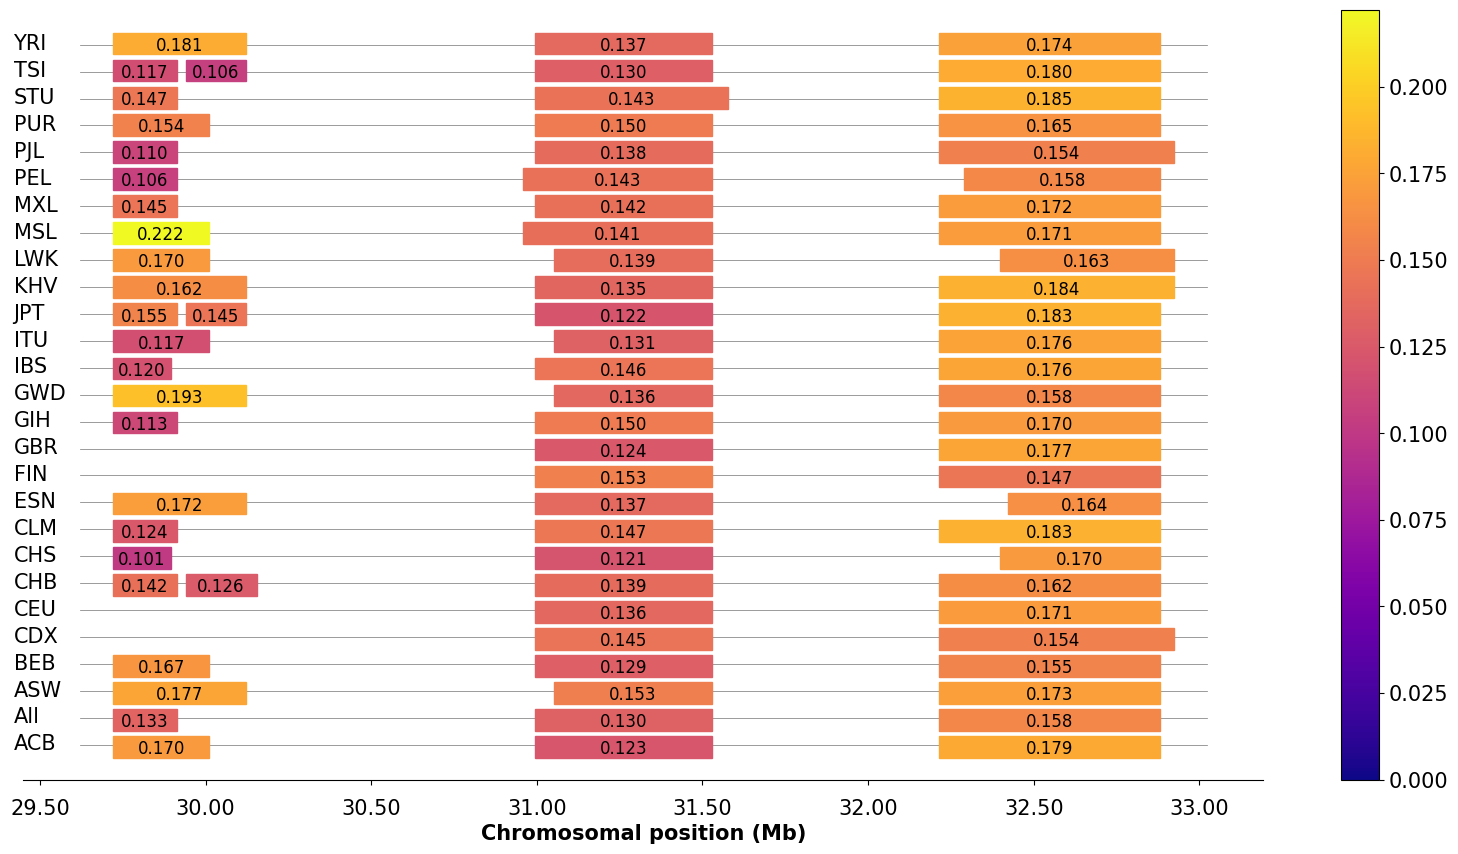

In [25]:
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
# plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
plt.figure(figsize=(20, 10), facecolor='white')
# plt.rcParams["figure.figsize"] = (20,17)
#{race:p-average}
import matplotlib

cmap = matplotlib.cm.get_cmap('plasma')
plt.gca().get_yaxis().set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
result_dict=dict()
for k,vs in mhc_race_positions_dict.items():
    middledict=dict()
    if vs:
        if k=="All":            
            for v in vs["mhc"]:
                pos_P_list=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=v[0]) & (df_mhc_pos_path["Unnamed: 0"]<=v[1])]["P"].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
        else:
            for v in vs["mhc"]:
                pos_P_list=df_race_pos[(df_race_pos["Unnamed: 0"]>=v[0]) & (df_race_pos["Unnamed: 0"]<=v[1])][k].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
            
minP = 0
# minP = np.min([np.min(list(x.values())) for x in result_dict.values()])
maxP = np.max([np.max(list(x.values())) for x in result_dict.values()])
minX = np.min([np.min(list(x.keys())) for x in result_dict.values()])/ 1000000 - 0.1
maxX = np.max([np.max(list(x.keys())) for x in result_dict.values()])/ 1000000 + 0.1
seen_races=set()
y = 0
for race,middledict_items in result_dict.items():
    y = y + 1
    plt.plot([minX, maxX], [y, y], color='gray', linewidth=0.55)
    plt.text(x=minX-0.2, y=y-0.2, s=race)
    for region,ava in middledict_items.items():
        x=[region[0],region[1]]
        c= (ava - minP) / (maxP - minP)
        plt.axvspan(x[0]/ 1000000, x[1]/ 1000000, (y-0.4)/(len(result_dict.items()) + 1.45)+0.007, (y + 0.4)/(len(result_dict.items()) +1.45)+0.007, color=cmap(c),  alpha=1, zorder=2)
        # plt.axhline(0.25, 0.75, xmin=y+10, xma=y+10, color='red')
        plt.text(x=np.mean(x)/ 1000000, y=y+y*0.0038-0.15, s="{:.3f}".format(ava), horizontalalignment='center',verticalalignment='center',fontsize=12)
        # plt.axvspan(0.25, 0.75, (x[0]/ 1000000 - minX) / (maxX - minX), (x[1]/ 1000000 - minX) / (maxX - minX), facecolor='0.5', alpha=0.5)
        if race not in seen_races:
            plt.scatter([], [], c=[], label=race, cmap='plasma')
            seen_races.add(race)
plt.clim(minP,maxP)
cbar = plt.colorbar()
# cbar.set_ticks([minP + t*(maxP-minP) for t in cbar.ax.get_yticks()])
handles, labels = plt.gca().get_legend_handles_labels()
order = [ 1, 0,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]

#plt.xticks(format='%.2f')
plt.tick_params(axis='both', which='major', labelsize=15,pad=10) 
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f')) 
plt.xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold')
plt.ylabel(r"Average disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')

plt.plot()




[]

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


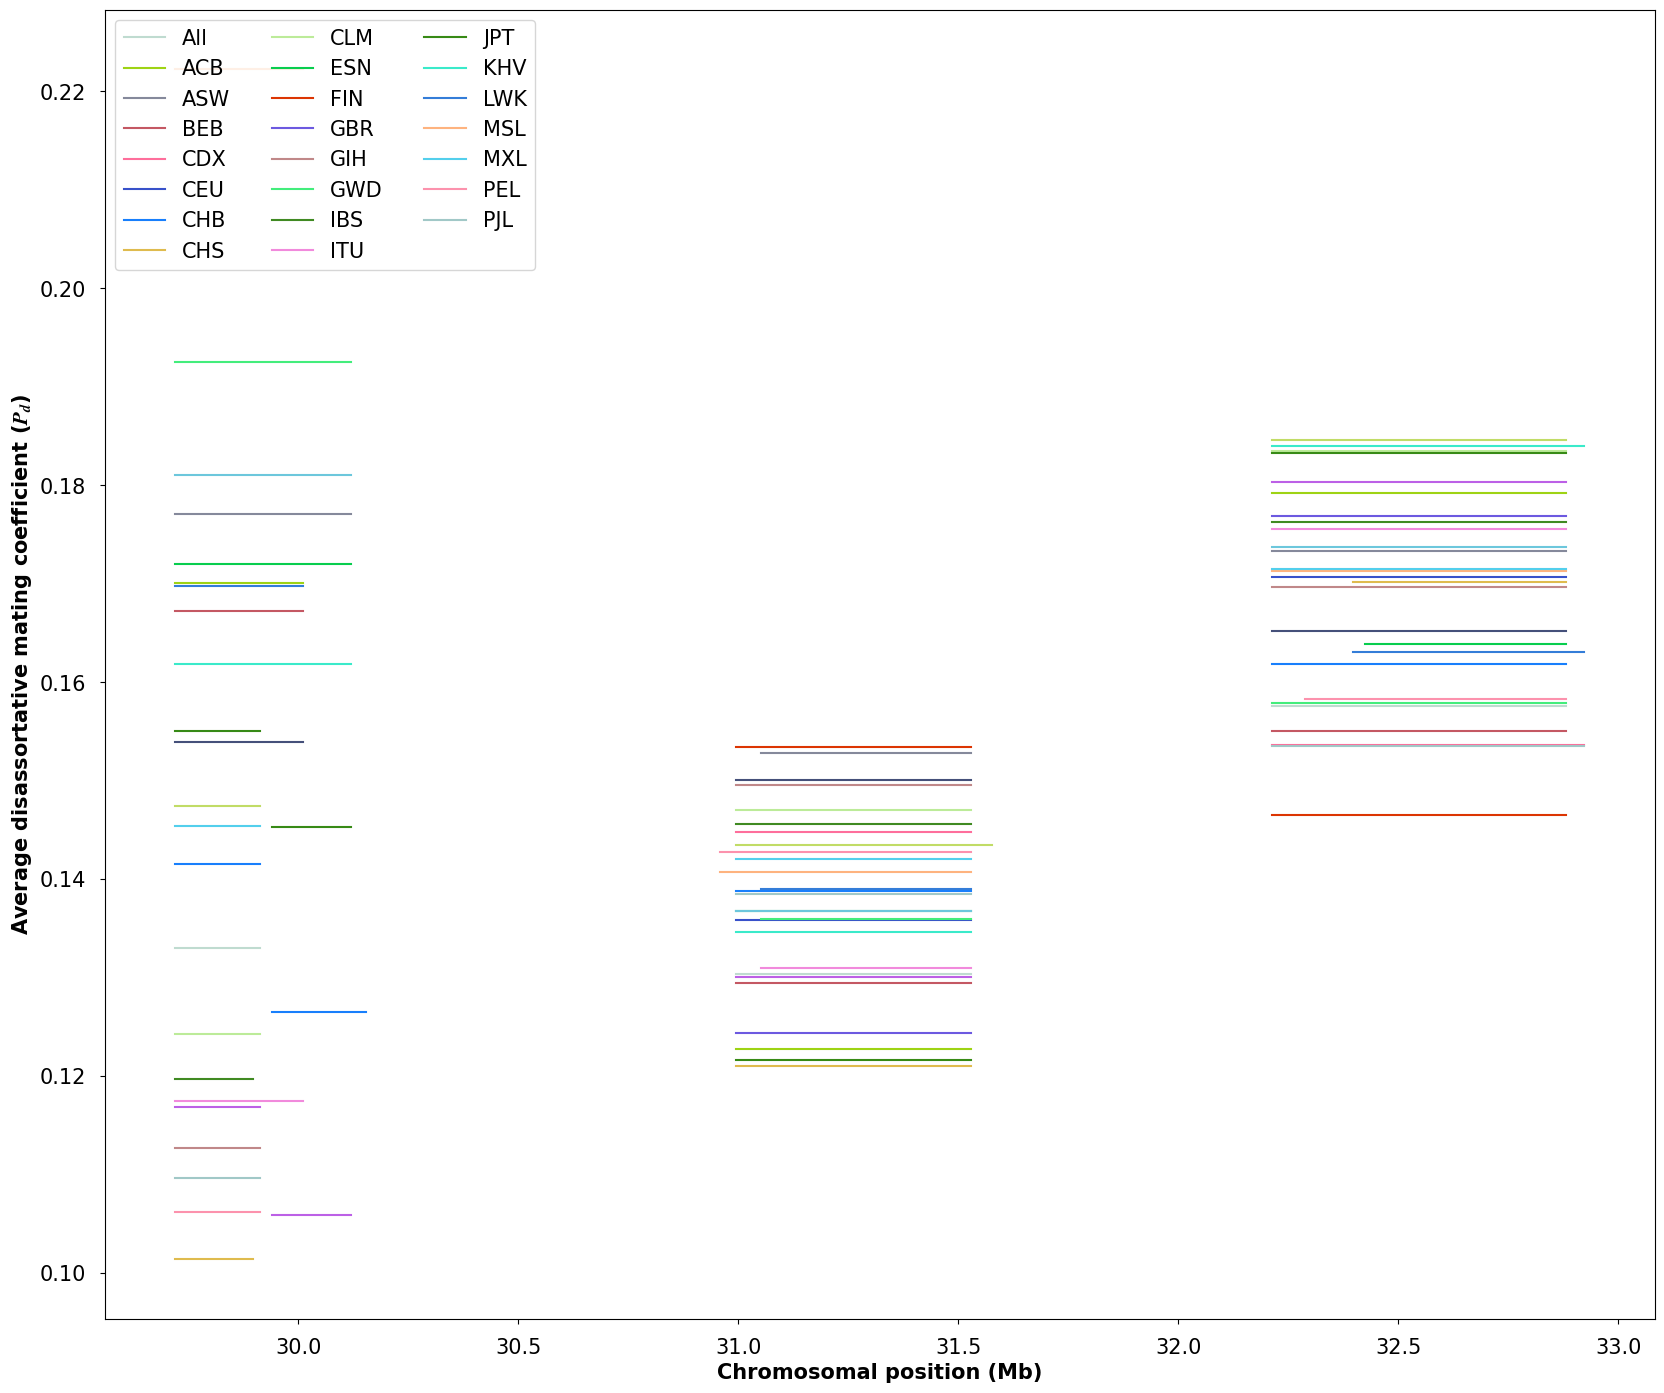

In [26]:
plt.rcParams['font.size'] = 15
plt.rcParams['grid.linewidth'] = 1.2
# plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.it'] = 'STIXGeneral:italic:bold'
plt.figure(figsize=(20, 17), facecolor='white')
# plt.rcParams["figure.figsize"] = (20,17)
#{race:p-average}
result_dict=dict()
for k,vs in mhc_race_positions_dict.items():
    middledict=dict()
    if vs:
        if k=="All":            
            for v in vs["mhc"]:
                pos_P_list=df_mhc_pos_path[(df_mhc_pos_path["Unnamed: 0"]>=v[0]) & (df_mhc_pos_path["Unnamed: 0"]<=v[1])]["P"].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
        else:
            for v in vs["mhc"]:
                pos_P_list=df_race_pos[(df_race_pos["Unnamed: 0"]>=v[0]) & (df_race_pos["Unnamed: 0"]<=v[1])][k].to_list()
                #print(pos_P_list)
                middledict[tuple(v)]=np.mean(pos_P_list)
            
                result_dict[k]=middledict#{race:{[start1,end1]:average1,[start2,end2]:average2,[start3,end3]:average3}}
            

seen_races=set()
for race,middledict_items in result_dict.items():

    for region,ava in middledict_items.items():
        x=[region[0],region[1]]
        y=[ava,ava]
        plt.plot(np.array(x)/ 1000000, y, color=zipped_color_list[race])
        if race not in seen_races:
            plt.plot([], [], color=zipped_color_list[race], label=race)
            seen_races.add(race)
            
handles, labels = plt.gca().get_legend_handles_labels()
order = [ 1, 0,   2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22]

plt.tick_params(axis='both', which='major', labelsize=15,pad=10) 
# plt.scatter(x_values1, y_values1,s=1)
# plt.title("Disassortative mating MHC region and Average Probability",fontsize=25)
# plt.xlabel("Position",fontsize=20)
plt.xlabel("Chromosomal position (Mb)",fontsize=15, weight = 'bold')
plt.ylabel(r"Average disassortative mating coefficient ($P_d$)",fontsize=15, weight = 'bold')

# plt.ylabel("Average Probability",fontsize=20)

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="upper left",fontsize=15,  ncol=3, frameon=True)
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc="upper left",fontsize=15,  bbox_to_anchor=(1.1, 1), frameon=True)
plt.plot()
# plt.savefig("pic2.pdf",dpi=600)

